# Problem

Household Power prediction

## About

This is a time series problem where we need to forecast power consumption  based on past consumption of power in household. 

In [1]:
# -*- coding: utf-8 -*-

This code is for perdiction cumsumption of household power.
Data: household power cunsumption data
Models: many models are used to get comparesion between them.


#Copyright@ H2HDATA

The entire prcess occurs in seven stages-
1. DATA INGESTION
2. DATA ANALYSIS 
3. DATA MUNGING
4. DATA EXPLORATION
5. DATA MODELING
6. HYPER-PARAMETERS OPTIMIZATION
7. PREDICTION
8. VISUAL ANALYSIS
9. RESULTS


Used library
1. pandas
2. numpy
3. time
4. sklearn
5. matplotlib
6. statsmodels



In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error as mse
import model
import helper

/usr/lib64/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Data Ingestion

In [3]:
data = helper.read_data()

/usr/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
#data = data.head(500)

## Data Description

Data Description
columns
1. Date; 					value: date
2. Time; 					value: time
3. Global_active_power; 	value: real
4. Global_reactive_power;	value: real
6. Voltage;				value: real
7. Global_intensity;		value: real
8. Sub_metering_1; 		value: real
9. Sub_metering_2; 		value: real
10. Sub_metering_3; 		value: real

## Data Munging

In [6]:
data.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Only Sub_metering_3 is described which implies other coloum to be of object type. First task is to make all column numeric except date and time and later we will do data analysis.

In [7]:
cols = data.columns
cols

Index([u'Date', u'Time', u'Global_active_power', u'Global_reactive_power',
       u'Voltage', u'Global_intensity', u'Sub_metering_1', u'Sub_metering_2',
       u'Sub_metering_3'],
      dtype='object')

In [8]:
for col in cols[2:]:
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0).astype(int)

In [9]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')
data['Time'] = data['Time'].dt.time
x =  data['Time']
data['DateTime'] = data.apply(lambda r : pd.datetime.combine(r['Date'],r['Time']),1)

In [13]:
data['DateTime'].head()
#data['time'] = data['Time']
#data['time']
#data.describe()


0   2006-12-16 17:24:00
1   2006-12-16 17:25:00
2   2006-12-16 17:26:00
3   2006-12-16 17:27:00
4   2006-12-16 17:28:00
Name: DateTime, dtype: datetime64[ns]

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
Date                     500 non-null datetime64[ns]
Time                     500 non-null object
Global_active_power      500 non-null int64
Global_reactive_power    500 non-null int64
Voltage                  500 non-null int64
Global_intensity         500 non-null int64
Sub_metering_1           500 non-null int64
Sub_metering_2           500 non-null int64
Sub_metering_3           500 non-null int64
DateTime                 500 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(7), object(1)
memory usage: 39.1+ KB


## Data Analysis

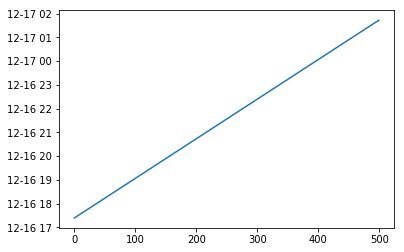

In [36]:
plt.plot(data['DateTime'])
plt.show()

From above It seen that data has porperly interval and so satisfy basic requirment for timeseries modeling.

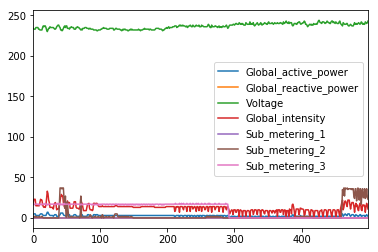

In [37]:
data.plot()
plt.show()

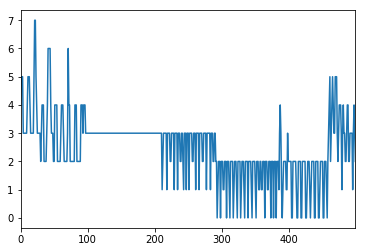

In [38]:
data['Global_active_power'].plot()
plt.show()

## Data Exploration

In [39]:
data.skew()

Global_active_power      0.099146
Global_reactive_power    0.000000
Voltage                  0.046377
Global_intensity         0.367103
Sub_metering_1           0.000000
Sub_metering_2           2.799978
Sub_metering_3          -0.332241
dtype: float64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
Date                     500 non-null datetime64[ns]
Time                     500 non-null object
Global_active_power      500 non-null int64
Global_reactive_power    500 non-null int64
Voltage                  500 non-null int64
Global_intensity         500 non-null int64
Sub_metering_1           500 non-null int64
Sub_metering_2           500 non-null int64
Sub_metering_3           500 non-null int64
DateTime                 500 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(7), object(1)
memory usage: 39.1+ KB


As data doesn't have outlier and missing value, so we will skip this step.

## Modeling

Here we are comaparing two model.
1. Basic model: Using only ARIMA model on active power.
2. Combined Model: This is combination of ARIMA and Linear Regression on all features.

### Basic Model

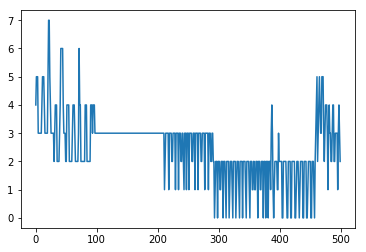

(array([-1.60883764]), array([0.89661738]), array([[-4.55918108,  1.3415058 ]]))


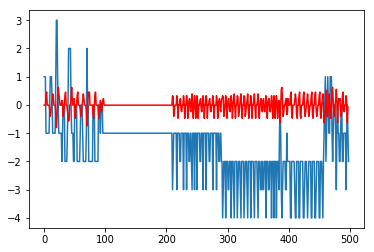

3.7272774078625788


In [41]:
data_s = data
model.simple_models(data_s)

### Combined Model

In [43]:
data.info()
model.combined_model(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
Date                     500 non-null datetime64[ns]
Time                     500 non-null object
Global_active_power      500 non-null int64
Global_reactive_power    500 non-null int64
Voltage                  500 non-null int64
Global_intensity         500 non-null int64
Sub_metering_1           500 non-null int64
Sub_metering_2           500 non-null int64
Sub_metering_3           500 non-null int64
DateTime                 500 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(7), object(1)
memory usage: 39.1+ KB
matric is singular : LinAlgError("Singular matrix") 
 cant run this model
